In [15]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM


Using TensorFlow backend.


In [16]:
# since we are using stateful rnn tsteps can be set to 1
tsteps = 1
batch_size = 25
epochs = 3
# number of elements ahead that are used to make the prediction
lahead = 1

In [26]:
def gen_tanh_amp(amp=100, period=1000, x0=0, xn=50000, step=1, k=0.0001):
    """Generates an absolute cosine time series with the amplitude
    exponentially decreasing
    Arguments:
        amp: amplitude of the cosine function
        period: period of the cosine function
        x0: initial x of the time series
        xn: final x of the time series
        step: step of the time series discretization
        k: exponential rate
    """
    tanh = np.zeros(((xn - x0) * step, 1, 1))
    for i in range(len(tanh)):
        idx = x0 + i * step
        tanh[i, 0, 0] = amp * np.tanh(2 * np.pi * idx / period)
        tanh[i, 0, 0] = tanh[i, 0, 0] * np.exp(-k * idx)
    return tanh

In [27]:
print('Generating Data')
tanh = gen_tanh_amp()
print('Input shape:', tanh.shape)
print (tanh[1:5])

Generating Data
Input shape: (50000, 1, 1)
[[[ 0.62824743]]

 [[ 1.25631963]]

 [[ 1.88416704]]

 [[ 2.51174019]]]


In [29]:
expected_output = np.zeros((len(tanh), 1))
for i in range(len(tanh) - lahead):
    expected_output[i, 0] = np.mean(tanh[i + 1:i + lahead + 1])

print('Output shape')
print(expected_output.shape)
print (expected_output[1:5])

Output shape
(50000, 1)
[[ 1.25631963]
 [ 1.88416704]
 [ 2.51174019]
 [ 3.13898963]]


In [30]:
print('Creating Model')
model = Sequential()
model.add(LSTM(20,
               batch_input_shape=(batch_size, tsteps, 1),
               return_sequences=True,
               stateful=True))
model.add(LSTM(20,
               batch_input_shape=(batch_size, tsteps, 1),
               return_sequences=False,
               stateful=True))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

Creating Model


In [31]:
print('Training')
for i in range(epochs):
    print('Epoch', i, '/', epochs)
    model.fit(tanh,
              expected_output,
              batch_size=batch_size,
              verbose=1,
              nb_epoch=1,
              shuffle=False)
    model.reset_states()

Training
Epoch 0 / 3


C:\Users\rajul\Anaconda3\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
50000/50000 [==============================] - 10s - loss: 674.8979    
Epoch 1 / 3
Epoch 1/1
50000/50000 [==============================] - 8s - loss: 414.9826     
Epoch 2 / 3
Epoch 1/1
50000/50000 [==============================] - 8s - loss: 281.2387     


In [32]:
print('Predicting')
predicted_output = model.predict(tanh, batch_size=batch_size)
print (expected_output[1:5])
print (predicted_output[1:5])
print (predicted_output.shape)

Predicting
[[ 1.25631963]
 [ 1.88416704]
 [ 2.51174019]
 [ 3.13898963]]
[[ 1.62699127]
 [ 1.61865747]
 [ 1.61314189]
 [ 1.6100986 ]]
(50000, 1)


In [33]:
print (expected_output[4001:4005])
print (predicted_output[4001:4005])
print (expected_output[40001:40005])
print (predicted_output[40001:40005])

[[ 67.01859954]
 [ 67.01189802]
 [ 67.00519716]
 [ 66.99849698]]
[[-1.35776436]
 [-1.36440599]
 [-1.36872494]
 [-1.37070191]]
[[ 1.83119761]
 [ 1.8310145 ]
 [ 1.83083141]
 [ 1.83064834]]
[[-1.79970729]
 [-1.79968679]
 [-1.79966629]
 [-1.79964626]]


Plotting Results


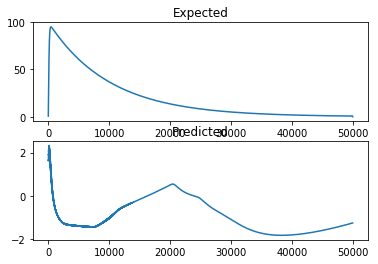

In [34]:
print('Plotting Results')
plt.subplot(2, 1, 1)
plt.plot(expected_output)
plt.title('Expected')
plt.subplot(2, 1, 2)
plt.plot(predicted_output)
plt.title('Predicted')
plt.show()

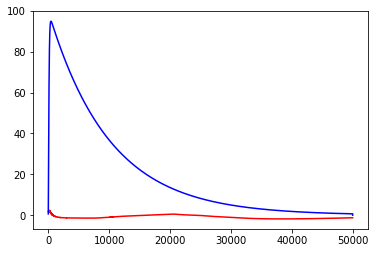

In [35]:
plt.plot(predicted_output, 'r-', expected_output, 'b-')
plt.show()